In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
df= pd.read_csv('CountryPopulationUpdate.csv')

In [6]:
df

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,AFG,NaN,1.962239,2.044523,2.105208,2.161195,2.233709,2.269651,2.306668,...,3.119959,2.535720,2.808337,2.910810,2.984389,3.153609,2.356098,1.435704,2.135594,2.836573
1,Africa Western and Central,AFW,NaN,2.103832,2.131522,2.170015,2.184894,2.216283,2.249277,2.264622,...,2.699359,2.672913,2.626296,2.533621,2.440048,2.389176,2.363829,2.332270,2.386204,2.398473
2,Angola,AGO,NaN,1.327797,0.989639,1.003666,1.027684,1.052133,1.070046,1.076727,...,3.605072,3.576441,3.540612,3.453233,3.387884,3.267959,3.181323,3.143026,3.080655,3.044200
3,Albania,ALB,NaN,3.120855,3.056731,2.953749,2.880686,2.754021,2.634564,2.630190,...,-0.291206,-0.159880,-0.091972,-0.246732,-0.426007,-0.574207,-0.926918,-1.215790,-1.148418,-1.148424
4,Andorra,AND,NaN,7.814817,7.519100,7.211506,6.883060,6.593796,7.023409,7.954821,...,-2.142484,0.009698,2.168040,1.878853,1.730503,1.177754,1.263629,1.696768,1.433748,1.329307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,2.662627,2.492744,2.456394,2.557772,2.705330,2.852944,2.998277,...,-1.361508,-0.600477,0.753859,0.338173,-0.457059,0.070410,-0.227726,-1.011945,-4.952263,-9.686344
260,"Yemen, Rep.",YEM,NaN,2.197731,2.220673,2.205000,2.289077,2.410960,2.485183,2.563877,...,3.040259,3.002138,3.012228,2.960379,2.966335,2.873204,2.744262,2.873344,3.009808,2.982104
261,South Africa,ZAF,NaN,2.806110,2.974517,3.031022,3.054031,3.074751,3.098315,3.119824,...,2.009888,0.940522,0.653837,1.682370,1.649575,1.622164,1.540557,1.413972,1.328101,1.249514
262,Zambia,ZMB,NaN,3.132588,3.146360,3.159932,3.155485,3.166240,3.196316,3.209735,...,3.120137,3.094091,3.067541,3.006019,2.961622,2.904165,2.815342,2.763650,2.794068,2.811823


In [21]:
afghanistan = df[df['Country Name'] == 'Afghanistan']

In [22]:
year_columns = df.columns[2:]  # columns from '1960' to '2024'
years = year_columns.astype(int)  # convert string years to integers

In [24]:
population = afghanistan.iloc[0, 2:].values  # get the first row, from col 2 onward


In [25]:
# Convert to float in case of mixed types
population = pd.to_numeric(population, errors='coerce')

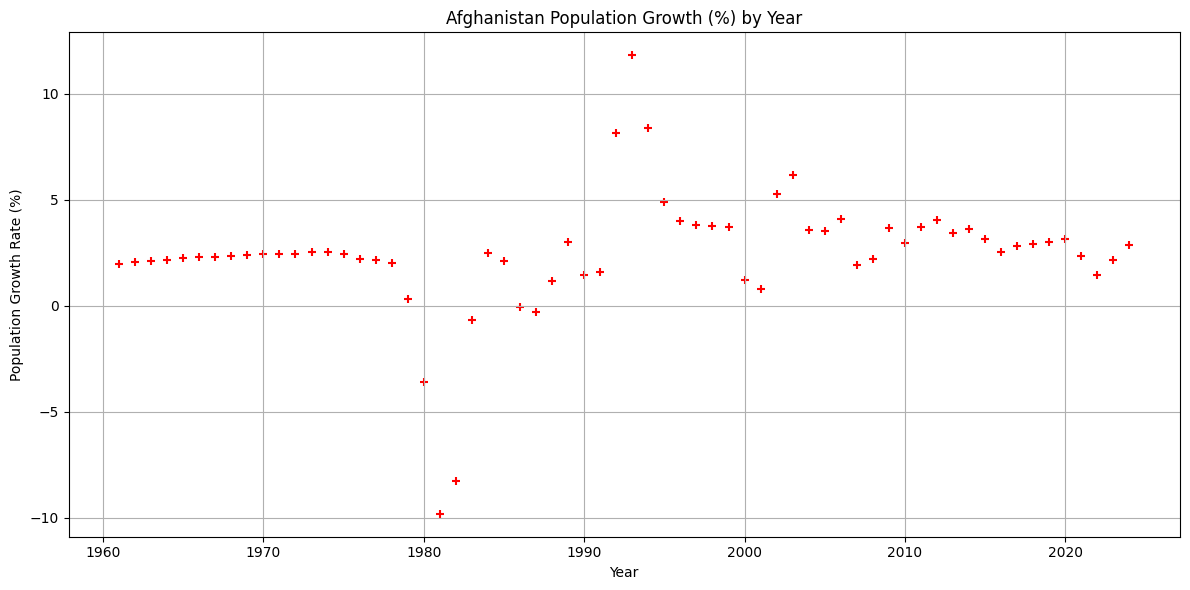

In [27]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(years, population, color='red', marker='+')
plt.title('Afghanistan Population Growth (%) by Year')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Step 2: Extract Afghanistan's data (row 0), from 1960 to 2024
afg = df[df['Country Name'] == 'Afghanistan'].iloc[0, 2:]


In [37]:
# Step 3: Extract X (years) and y (growth rate values)
years = afg.index.astype(int)  # years as integers
growth_rates = pd.to_numeric(afg.values, errors='coerce')  # growth values as float


In [39]:
# Step 4: Remove any NaN values
valid = ~np.isnan(growth_rates)

In [43]:
X = years[valid].to_numpy().reshape(-1, 1)  # X: 2D array

In [44]:
y = growth_rates[valid]        # y: 1D array

In [45]:
# Train model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [46]:
future_years = np.array(range(2025, 2031)).reshape(-1, 1)
predictions = model.predict(future_years)


In [48]:
year_to_predict = 2030

In [49]:
predicted_growth = model.predict([[year_to_predict]])
print(f"Predicted growth rate for {year_to_predict}: {predicted_growth[0]:.2f}%")


Predicted growth rate for 2030: 3.79%


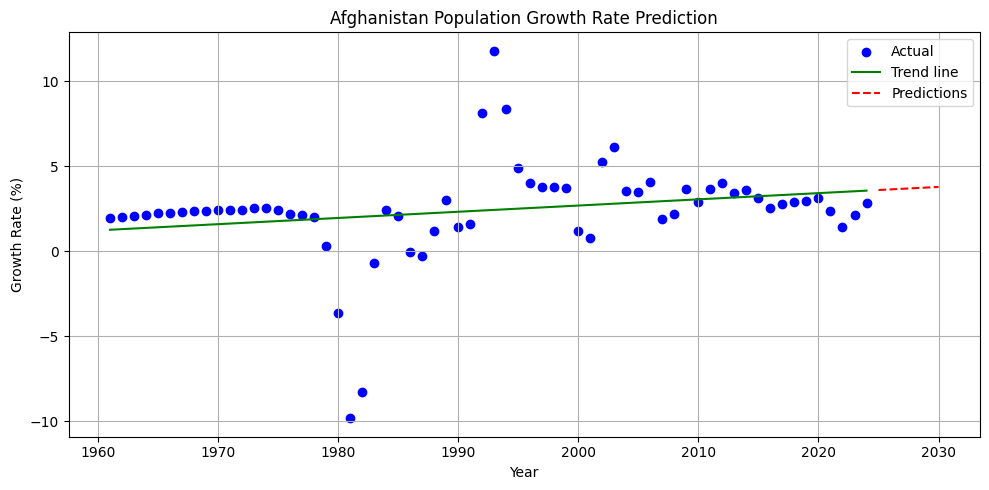

In [50]:
# Plot
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Actual', color='blue')
plt.plot(X, model.predict(X), color='green', label='Trend line')
plt.plot(future_years, predictions, color='red', linestyle='--', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.title('Afghanistan Population Growth Rate Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
future_years = np.arange(2025, 2033).reshape(-1, 1)
future_predictions = model.predict(future_years)


In [58]:
future_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Growth Rate (%)': np.round(future_predictions, 2)
})


In [59]:
output_file = 'Afghanistan_Predicted_Growth_2025_2032.csv'
future_df.to_csv(output_file, index=False)

print(f"Predictions saved to '{output_file}' successfully!")
print(future_df)

Predictions saved to 'Afghanistan_Predicted_Growth_2025_2032.csv' successfully!
   Year  Predicted Growth Rate (%)
0  2025                       3.61
1  2026                       3.65
2  2027                       3.68
3  2028                       3.72
4  2029                       3.76
5  2030                       3.79
6  2031                       3.83
7  2032                       3.87


In [60]:
future_years = np.arange(2033, 2040).reshape(-1, 1)
future_predictions = model.predict(future_years)

In [61]:
future_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Growth Rate (%)': np.round(future_predictions, 2)
})


In [62]:
year_to_predict = 2034

In [66]:
predicted_growth = model.predict([[year_to_predict]])
print(f"Predicted growth rate for {year_to_predict}: {predicted_growth[0]:.2f}%")

Predicted growth rate for 2034: 3.94%


In [67]:
year_to_predict = 2050
predicted_growth = model.predict([[year_to_predict]])
print(f"Predicted growth rate for {year_to_predict}: {predicted_growth[0]:.2f}%")

Predicted growth rate for 2050: 4.52%
